In [87]:
from shapely import *
import shapely.plotting as splt
import shapely.ops as sopt
import shapely as shp
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# split room into points, create cells around each points, and determine the adjacency of these cells 

# create a room 
# create offset curve to describe surroundings, and make it into a polygon 
# use numpy to make a mesh of points that are evenly distributed 
# use buffer to create cells based on these points and the overlap/ intersection with the polygons 
# give cells properties based on their relation to the room/surroundings...
# use str tree thing to identify neighbours of each cell 

In [89]:
# create a room 
room_lx = 20 #m - length in x
room_ly= 10 #m 
room_poly = box(0.0, 0.0, room_lx, room_ly)

In [49]:
# use buffer to describe ambient 
amb_poly = room_poly.buffer(1, cap_style="square", join_style="mitre")

In [98]:
# use numpy to make a mesh of points that are evenly distributed 
room_xy = room_poly.exterior.coords.xy

num_points = 5
x = np.linspace(np.min(room_xy[0]), np.max(room_xy[0]), num_points)
y = np.linspace(np.min(room_xy[1]), np.max(room_xy[1]), num_points)
xv, yv = np.meshgrid(x,y)

room_pts = [(x,y) for x,y in zip(xv.flatten(), yv.flatten())]

In [119]:
def box_from_centroid(centroid, dx, dy):
    # centroid should be a tuple
    # create a box based on a centroid with coordinates going in ccw direction (starting from top-left => v1, v2, v3, v4 <= top right)
    cx, cy = centroid

    v1x = v2x = cx - dx/2
    v4x = v3x = cx + dx/2

    v1y = v4y = cy - dy/2
    v2y = v3y = cy + dy/2

    coords = (
        (v1x, v1y),
        (v2x, v2y),
        (v3x, v3y),
        (v4x, v4y)
    )

    return Polygon(coords)


In [135]:
dx = room_lx/(num_points - 1)
dy = room_ly/(num_points - 1)
cells = [box_from_centroid(pt, dx, dy) for pt in room_pts]

#all cells should have the same area 
assert len(np.unique(np.array([cell.area for cell in cells2]))) == 1


### plotting

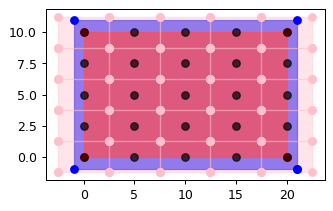

In [136]:
GM = (np.sqrt(5)-1.0)/2.0
W = 4
H = W*GM
SIZE = (W, H)

fig = plt.figure(figsize=SIZE,  dpi=90)
ax = fig.add_subplot(111)


splt.plot_polygon(amb_poly, ax=ax, alpha=0.7, color="blue")
splt.plot_polygon(room_poly, ax=ax, alpha=0.7, color="red")

splt.plot_points(MultiPoint(room_pts), ax=ax, alpha=0.7, color="black")

for cell in cells:
    splt.plot_polygon(cell, ax=ax, alpha=0.4, color="pink")